In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

archivo_csv = r"C:\Users\hctrl\OneDrive\Tesis\Matrices\Temperatura Media\II Región\MatrizTMII.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

         ID_CIDERH REGION   FECHA_RBE  TEMP_MEDIA_RBE    LAT_Y    LON_X
0       M_001_B_II     II  1994-06-01             8.6 -22.4953 -69.9044
1       M_001_B_II     II  1994-06-02             9.5 -22.4953 -69.9044
2       M_001_B_II     II  1994-06-03            12.6 -22.4953 -69.9044
3       M_001_B_II     II  1994-06-04            10.7 -22.4953 -69.9044
4       M_001_B_II     II  1994-06-05            10.6 -22.4953 -69.9044
...            ...    ...         ...             ...      ...      ...
146671    M_232_AA     II  1985-04-24            21.0 -22.5000 -68.9170
146672    M_232_AA     II  1986-04-16             3.0 -22.5000 -68.9170
146673    M_232_AA     II  1986-09-20            22.0 -22.5000 -68.9170
146674    M_232_AA     II  1986-11-23            21.0 -22.5000 -68.9170
146675    M_232_AA     II  1987-10-18             8.0 -22.5000 -68.9170

[146676 rows x 6 columns]


ID_CIDERH   M_022_A_II  M_023_A_II  M_024_A_II  M_027_A_II
ID_CIDERH                                                 
M_022_A_II    1.000000    0.697155    0.625462    0.707293
M_023_A_II    0.697155    1.000000    0.696090    0.689432
M_024_A_II    0.625462    0.696090    1.000000    0.560623
M_027_A_II    0.707293    0.689432    0.560623    1.000000


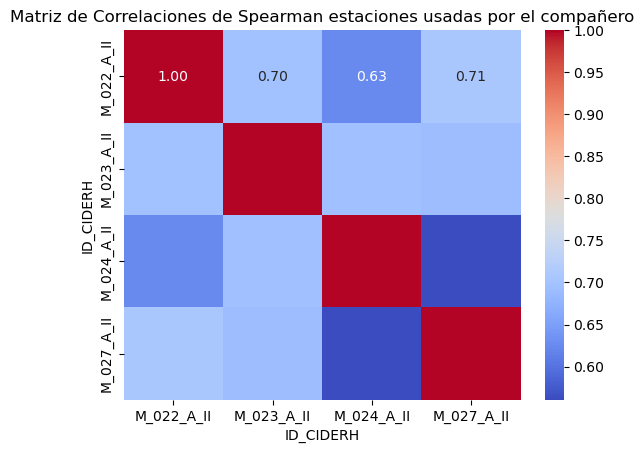

Cantidad de datos de TEMP_MEDIA_RBE por estación:
ID_CIDERH
M_022_A_II    7337
M_023_A_II    5695
M_024_A_II    6490
M_027_A_II    7279
Name: TEMP_MEDIA_RBE, dtype: int64


In [3]:
# Lista de estaciones específicas
estaciones_especificas = ['M_022_A_II', 'M_023_A_II', 'M_024_A_II', 'M_027_A_II']

# Filtra los datos para las estaciones específicas
datos_especificos = datos[datos['ID_CIDERH'].isin(estaciones_especificas)]

# Pivotar los datos para obtener una matriz de temperaturas mínimas por fecha y estación
matriz_temp_min = datos_especificos.pivot(index='FECHA_RBE', columns='ID_CIDERH', values='TEMP_MEDIA_RBE')

# Calcular la matriz de correlaciones de Spearman
matriz_correlaciones = matriz_temp_min.corr(method='spearman')

# Mostrar la matriz de correlaciones
print(matriz_correlaciones)

# Visualizar la matriz de correlaciones con un mapa de calor usando seaborn
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones de Spearman estaciones usadas por el compañero')
plt.show()

# Contar la cantidad de datos de TEMP_MEDIA_RBE para cada estación seleccionada
cantidad_datos_temp_min_por_estacion = datos_especificos.groupby('ID_CIDERH')['TEMP_MEDIA_RBE'].count()

# Mostrar la cantidad de datos para cada estación
print("Cantidad de datos de TEMP_MEDIA_RBE por estación:")
print(cantidad_datos_temp_min_por_estacion)

In [1]:
import pandas as pd
from scipy.stats import anderson
import numpy as np

def anderson_darling_p_value(statistic):
    """Calcula el valor p aproximado para el estadístico de Anderson-Darling."""
    if statistic < 0.2:
        return 1 - np.exp(-13.436 + 101.14 * statistic - 223.73 * statistic**2)
    elif statistic < 0.34:
        return 1 - np.exp(-8.318 + 42.796 * statistic - 59.938 * statistic**2)
    elif statistic < 0.6:
        return np.exp(0.9177 - 4.279 * statistic - 1.38 * statistic**2)
    elif statistic < 10:
        return np.exp(1.2937 - 5.709 * statistic + 0.0186 * statistic**2)
    else:
        return np.exp(1.2937 - 5.709 * 10 + 0.0186 * 10**2)

# Cargar el archivo CSV
archivo_csv = r"C:\Users\hctrl\OneDrive\Tesis\Matrices\Temperatura Media\II Región\MatrizTMII.csv"
df = pd.read_csv(archivo_csv)

# Obtener la lista de estaciones únicas
estaciones = df['ID_CIDERH'].unique()

# Lista de estaciones específicas
estaciones_especificas = ['M_023_A_II', 'M_022_A_II', 'M_024_A_II', 'M_027_A_II']

# Nivel de significancia para la prueba de Anderson-Darling
significance_level = 0.05

# Iterar sobre cada estación
for estacion_id in estaciones_especificas:
    # Filtrar los datos para la estación ID_CIDERH específica
    estacion_data = df[df['ID_CIDERH'] == estacion_id]

    # Seleccionar la variable de interés (TEMP_MEDIA_RBE)
    temp_min_data = estacion_data['TEMP_MEDIA_RBE']

    # Eliminar valores NaN si es necesario
    temp_min_data = temp_min_data.dropna()

    # Calcular la prueba de Anderson-Darling
    result = anderson(temp_min_data, dist='norm')

    print("Resultados de la prueba de Anderson-Darling para la estación", estacion_id)
    print("Estadístico de Anderson-Darling:", result.statistic)

    # Calcular el valor p aproximado
    p_value = anderson_darling_p_value(result.statistic)
    print("Valor p aproximado: {:.2e}".format(p_value))

    # Evaluar si se rechaza la hipótesis nula al nivel de significancia dado
    if p_value < significance_level:
        print(f"La hipótesis nula se rechaza al nivel de significancia {significance_level}.")
    else:
        print(f"No se puede rechazar la hipótesis nula al nivel de significancia {significance_level}.")

Resultados de la prueba de Anderson-Darling para la estación M_023_A_II
Estadístico de Anderson-Darling: 9.651905289907518
Valor p aproximado: 2.42e-23
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Anderson-Darling para la estación M_022_A_II
Estadístico de Anderson-Darling: 14.666990621614787
Valor p aproximado: 3.76e-24
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Anderson-Darling para la estación M_024_A_II
Estadístico de Anderson-Darling: 5.451163505249497
Valor p aproximado: 1.93e-13
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Anderson-Darling para la estación M_027_A_II
Estadístico de Anderson-Darling: 37.26209132195072
Valor p aproximado: 3.76e-24
La hipótesis nula se rechaza al nivel de significancia 0.05.


In [3]:
from statsmodels.stats.diagnostic import lilliefors

# Cargar datos desde el archivo CSV
archivo_csv = r"C:\Users\hctrl\OneDrive\Tesis\Matrices\Temperatura Media\II Región\MatrizTMII.csv"
datos = pd.read_csv(archivo_csv, low_memory=False)

# Filtrar datos para la variable TEMP_MEDIA_RBE
variable_interes = 'TEMP_MEDIA_RBE'

# Iterar sobre cada estación meteorológica
estaciones = datos['ID_CIDERH'].unique()

# Lista de estaciones específicas
estaciones_especificas = ['M_023_A_II', 'M_022_A_II', 'M_024_A_II', 'M_027_A_II']

for estacion in estaciones_especificas:
    # Filtrar datos para la estación actual
    datos_estacion = datos[datos['ID_CIDERH'] == estacion][variable_interes]

    # Realizar prueba de normalidad de Lilliefors
    estadistico, p_valor = lilliefors(datos_estacion)

    # Imprimir resultados
    print(f"Estación: {estacion}")
    print(f"Estadístico de prueba: {estadistico}")
    print(f"P-valor: {p_valor}")

Estación: M_023_A_II
Estadístico de prueba: 0.031432565468245355
P-valor: 0.0009999999999998899
Estación: M_022_A_II
Estadístico de prueba: 0.036968472891327986
P-valor: 0.0009999999999998899
Estación: M_024_A_II
Estadístico de prueba: 0.030527206606951518
P-valor: 0.0009999999999998899
Estación: M_027_A_II
Estadístico de prueba: 0.05791732459758142
P-valor: 0.0009999999999998899


In [4]:
import pandas as pd
from scipy.stats import kstest, norm

# Cargar el archivo CSV
archivo_csv = r"C:\Users\hctrl\OneDrive\Tesis\Matrices\Temperatura Media\II Región\MatrizTMII.csv"
df = pd.read_csv(archivo_csv)

# Obtener la lista de estaciones únicas
estaciones = df['ID_CIDERH'].unique()

# Lista de estaciones específicas
estaciones_especificas = ['M_023_A_II', 'M_022_A_II', 'M_024_A_II', 'M_027_A_II']

# Iterar sobre cada estación
for estacion_id in estaciones_especificas:
    # Filtrar los datos para la estación ID_CIDERH específica
    estacion_data = df[df['ID_CIDERH'] == estacion_id]

    # Seleccionar la variable de interés (TEMP_MEDIA_RBE)
    temp_min_data = estacion_data['TEMP_MEDIA_RBE']

    # Eliminar valores NaN si es necesario
    temp_min_data = temp_min_data.dropna()

    # Normalizar los datos a una distribución normal estándar
    mean = temp_min_data.mean()
    std = temp_min_data.std()
    standardized_data = (temp_min_data - mean) / std

    # Calcular la prueba de Kolmogorov-Smirnov
    statistic, p_value = kstest(standardized_data, 'norm')

    print("Resultados de la prueba de Kolmogorov-Smirnov para la estación", estacion_id)
    print("Estadístico de prueba:", statistic)
    print("Valor p: {:.2e}".format(p_value))

    # Evaluar si se rechaza la hipótesis nula al nivel de significancia dado
    if p_value < significance_level:
        print(f"La hipótesis nula se rechaza al nivel de significancia {significance_level}.")
    else:
        print(f"No se puede rechazar la hipótesis nula al nivel de significancia {significance_level}.")

Resultados de la prueba de Kolmogorov-Smirnov para la estación M_023_A_II
Estadístico de prueba: 0.0314325654682453
Valor p: 2.53e-05
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Kolmogorov-Smirnov para la estación M_022_A_II
Estadístico de prueba: 0.0369684728913281
Valor p: 3.79e-09
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Kolmogorov-Smirnov para la estación M_024_A_II
Estadístico de prueba: 0.03052720660695174
Valor p: 1.09e-05
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Kolmogorov-Smirnov para la estación M_027_A_II
Estadístico de prueba: 0.057917324597581366
Valor p: 1.15e-21
La hipótesis nula se rechaza al nivel de significancia 0.05.
